In [1]:
import sys
import os
sys.path.append('../dags')

from database import create_database_engine


# 환경 변수 설정
os.environ["POSTGRES_USER"] = "airflow"
os.environ["POSTGRES_PASSWORD"] = "airflow"
os.environ["POSTGRES_DB"] = "events"
os.environ["POSTGRES_PORT"] = "5433"

engine = create_database_engine(host="127.0.0.1")
print("Successfully connected to the database")

Successfully connected to the database


In [2]:
import pandas as pd
from datetime import datetime
table = "kind"

start_date = datetime(2021, 1, 1)
end_date = datetime(2023, 12, 31)

query = f"""SELECT * FROM {table}
WHERE stock_code != ''
  AND market IN ('KOSPI', 'KOSDAQ', 'KOSDAQ GLOBAL')
  AND disclosed_at >= %(start_date)s
  AND disclosed_at <= %(end_date)s
  AND label is not NULL
ORDER BY disclosed_at ASC"""

df = pd.read_sql(query, engine, params={"start_date": start_date, "end_date": end_date})
print(f"데이터베이스에서 조회된 공시 이벤트 수: {len(df)}")
df.head()


DETAIL:  The database was created using collation version 2.36, but the operating system provides version 2.41.
HINT:  Rebuild all objects in this database that use the default collation and run ALTER DATABASE events REFRESH COLLATION VERSION, or build PostgreSQL with the right library version.


데이터베이스에서 조회된 공시 이벤트 수: 23096


,id,disclosure_id,disclosed_at,company_name,stock_code,short_code,market,title,summary_kr,raw,detail_url,created_at,updated_at,is_modify,disclosure_type,dart_unique_id,masked,label
0,157471,20210104000042,2021-01-04 08:40:00,디모아,KR7016670002,016670,KOSDAQ,영업정지,디모아는 2021년 1월 1일부터 어도비시스템즈의 국내 총판권에 대한 영업정지를 받...,영업정지 정보\n====================\n회사명: 디모아\n법인구분:...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.081166,2025-10-17 04:09:46.256941,0,영업정지,00125725,회사 A는 2021년 1월 1일부터 회사 B의 국내 총판권에 대한 영업정지를 받고 ...,0
1,157469,20210104000057,2021-01-04 09:18:00,두산퓨얼셀,KR7336260005,336260,KOSPI,단일판매ㆍ공급계약체결,이 보고서는 2020년 12월 31일에 체결된 국내 연료전지 시스템 공급 계약에 관...,1. 판매ㆍ공급계약 구분: 기타 판매ㆍ공급계약\n- 체결계약명: 연료전지 시스템 공...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.080484,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,01412725,이 보고서는 2020년 12월 31일에 체결된 국내 연료전지 시스템 공급 계약에 관...,0
2,157467,20210104000059,2021-01-04 09:30:00,인텍플러스,KR7064290000,064290,KOSDAQ,단일판매ㆍ공급계약체결(자율공시),이 회사는 대만의 TAKEWIN INTERNATIONAL과 2020년 12월에 비메...,1. 판매ㆍ공급계약 내용: 비메모리용 Substrate 검사 장비\n2. 계약내역\...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.079747,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,00479787,이 회사는 대만의 회사 A과 2020년 12월에 비메모리용 Substrate 검사 ...,0
3,157461,20210104000070,2021-01-04 10:08:00,에코바이오,KR7038870002,038870,KOSDAQ,단일판매ㆍ공급계약체결,"이 계약은 수도권매립지관리공사와 체결한 수도권매립지 제1,2매립장 유지관리 용역으로...","1. 판매ㆍ공급계약 내용: 수도권매립지 제 1,2매립장 시설물 유지관리 용역(장기계...",https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.077638,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,00287812,"이 계약은 회사 A와 체결한 수도권매립지 제1,2매립장 유지관리 용역으로, 1차년도...",0
4,157459,20210104000088,2021-01-04 10:08:00,제이엘케이,KR7322510009,322510,KOSDAQ,단일판매ㆍ공급계약체결,이 기업은 인공지능 기반 캡슐내시경 소프트웨어 개발 및 공급계약을 주식회사 인트로메...,1. 판매ㆍ공급계약 내용: 인공지능(Ai)기반 캡슐내시경 소프트웨어 기술개발 공급 ...,https://kind.krx.co.kr/common/disclsviewer.do?...,2025-09-20 12:22:30.076901,2025-10-17 04:09:46.256941,0,단일판매ㆍ공급계약체결,01153293,이 기업은 인공지능 기반 캡슐내시경 소프트웨어 개발 및 공급계약을 주식회사 A와 체...,1


시장별 공시 분포:
market
KOSPI      9305
KOSDAQ    13791
Name: count, dtype: int64

총 공시 건수: 23096

시장별 비율:
KOSPI: 9305건 (40.3%)
KOSDAQ: 13791건 (59.7%)


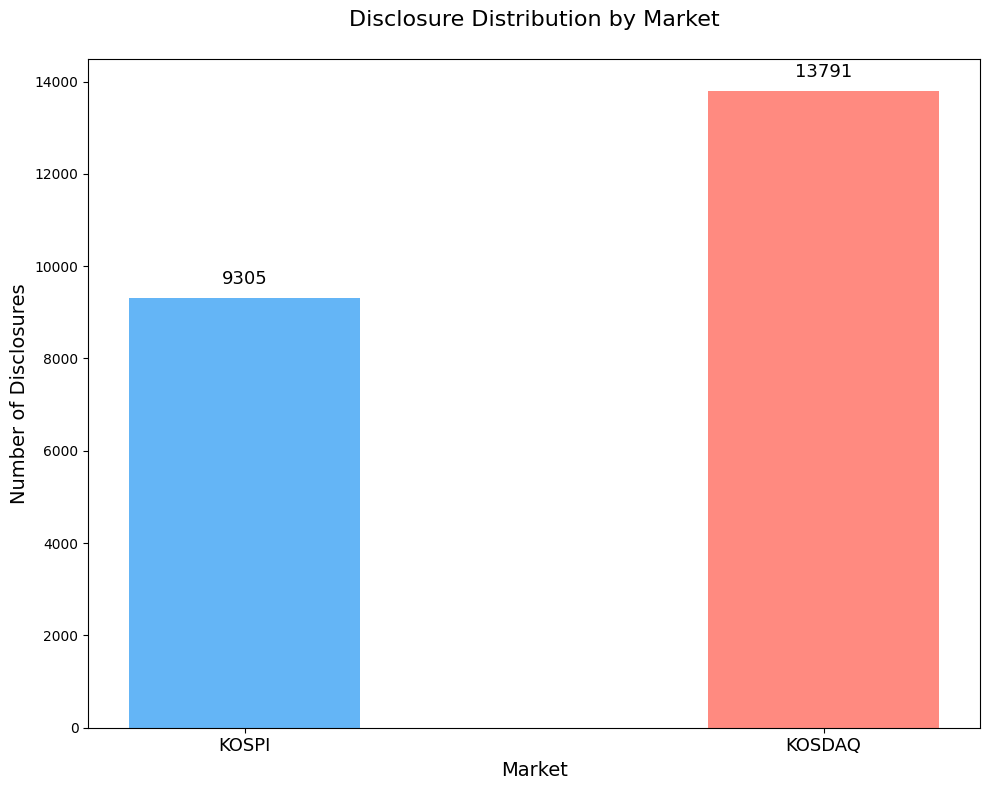

In [3]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 시장 순서를 KOSPI, KOSDAQ(및 GLOBAL)로 정렬
market_order = ['KOSPI', 'KOSDAQ', 'KOSDAQ GLOBAL']
# Series를 위 순서로 재정렬(존재하는 시장만)
market_counts = df['market'].value_counts()
ordered_markets = [m for m in market_order if m in market_counts.index]
market_counts = market_counts.loc[ordered_markets]

print("시장별 공시 분포:")
print(market_counts)
print(f"\n총 공시 건수: {len(df)}")
print("\n시장별 비율:")
for market, count in market_counts.items():
    ratio = count / len(df) * 100
    print(f"{market}: {count}건 ({ratio:.1f}%)")

# 시각화 (figure 세로길이 더 길게, 비율(pie) figure 제거)
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

# 색깔을 더 연하게, bar를 얇게 설정
color_map = {
    'KOSPI': '#64b5f6',        # 연한 파란색
    'KOSDAQ': '#ff8a80',       # 연한 빨간색
    'KOSDAQ GLOBAL': '#ffd180' # 연한 주황색
}
bar_colors = [color_map[m] for m in market_counts.index]

bar_width = 0.4  # bar 두께를 얇게 지정

# 직접 bar plot (pandas plot 대신 matplotlib 사용)
bars = ax1.bar(
    x=range(len(market_counts)),
    height=market_counts.values,
    color=bar_colors,
    width=bar_width
)

ax1.set_xticks(range(len(market_counts)))
ax1.set_xticklabels(market_counts.index, fontsize=13)
ax1.set_title('Disclosure Distribution by Market', fontsize=16, pad=24)
ax1.set_xlabel('Market', fontsize=14)
ax1.set_ylabel('Number of Disclosures', fontsize=14)
ax1.tick_params(axis='x', rotation=0)  # 회전 없이 일자

# 각 막대 위에 값 표시
for i, v in enumerate(market_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=13)

plt.tight_layout()
plt.show()


공시 발표 시간대별 분포 (KST 기준):
market_session
After Hours      13839
Trading Hours     9257
Name: count, dtype: int64

장중 비율: 40.1%
장외 비율: 59.9%


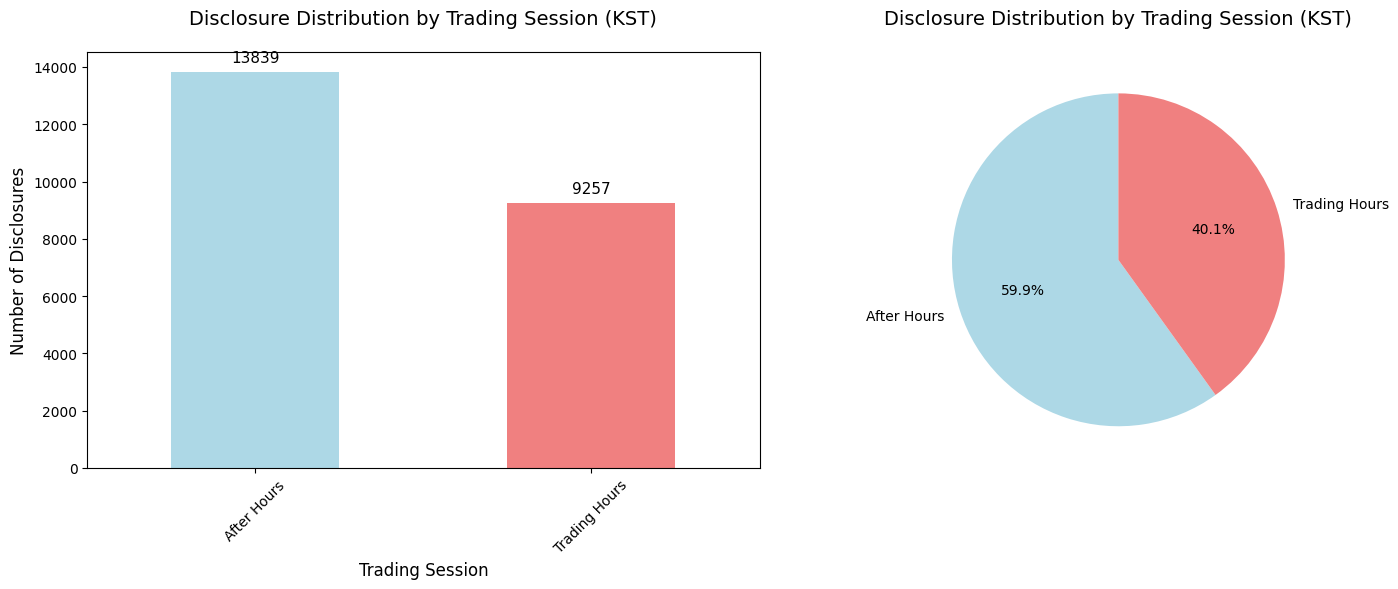

<Figure size 640x480 with 0 Axes>

In [4]:
# disclosed_at을 datetime으로 변환 (이미 KST 기준으로 저장됨)
df['disclosed_at'] = pd.to_datetime(df['disclosed_at'])

# 이미 KST 기준이므로 그대로 사용
df['disclosed_at_kst'] = df['disclosed_at']
df = df.sort_values('disclosed_at_kst')
df['time_only'] = df['disclosed_at_kst'].dt.time

# 장중 시간 정의 (9:00 ~ 15:20) - KST 기준
import datetime
market_open = datetime.time(9, 0)
market_close = datetime.time(15, 20)

# 장중/장외 분류
df['market_session'] = df['time_only'].apply(
    lambda x: 'Trading Hours' if market_open <= x <= market_close else 'After Hours'
)

# 결과 집계
session_counts = df['market_session'].value_counts()
print("공시 발표 시간대별 분포 (KST 기준):")
print(session_counts)
print(f"\n장중 비율: {session_counts.get('Trading Hours', 0) / len(df) * 100:.1f}%")
print(f"장외 비율: {session_counts.get('After Hours', 0) / len(df) * 100:.1f}%")

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 막대 그래프
session_counts.plot(kind='bar', ax=ax1, color=['lightblue', 'lightcoral'])
ax1.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)
ax1.set_xlabel('Trading Session', fontsize=12)
ax1.set_ylabel('Number of Disclosures', fontsize=12)
ax1.tick_params(axis='x', rotation=45)

# 각 막대 위에 값 표시
for i, v in enumerate(session_counts.values):
    ax1.text(i, v + len(df)*0.01, str(v), ha='center', va='bottom', fontsize=11)

# 파이 차트
session_ratios = session_counts / len(df) * 100
ax2.pie(session_ratios.values, labels=session_ratios.index, autopct='%1.1f%%', 
        startangle=90, colors=['lightblue', 'lightcoral'])
ax2.set_title('Disclosure Distribution by Trading Session (KST)', fontsize=14, pad=20)

plt.tight_layout()
plt.show()

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
from datetime import datetime

# 1분 단위 abn_ret 컬럼을 -9분~+9분까지 모두 추가
minute_offsets = list[int](range(-9, 0)) + list(range(1, 10))
minute_columns = [f"ar.abn_ret_{'minus_' if m < 0 else ''}{abs(m)}m" for m in minute_offsets]

# 기존 10, 20, ... 60m 컬럼
more_minute_columns = [
    "ar.abn_ret_minus_60m",
    "ar.abn_ret_minus_50m",
    "ar.abn_ret_minus_40m",
    "ar.abn_ret_minus_30m",
    "ar.abn_ret_minus_20m",
    "ar.abn_ret_minus_10m",
    "ar.abn_ret_10m",
    "ar.abn_ret_20m",
    "ar.abn_ret_30m",
    "ar.abn_ret_40m",
    "ar.abn_ret_50m",
    "ar.abn_ret_60m"
]

all_abn_ret_cols = ',\n    '.join(minute_columns + more_minute_columns)

query = f"""
SELECT ar.event_id,
    ar.event_ts,
    {all_abn_ret_cols},
    k.company_name,
    k.disclosure_type,
    k.masked,
    k.label
FROM abnormal_return_kind ar
JOIN "kind" k ON ar.event_id = k.id
WHERE k.disclosed_at >= '{start_date.strftime('%Y-%m-%d')}'
  AND k.disclosed_at <= '{end_date.strftime('%Y-%m-%d')}'
ORDER BY k.disclosed_at ASC
"""

target_df = pd.read_sql(query, engine)
target_df

,event_id,event_ts,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,...,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,company_name,disclosure_type,masked,label
0,157461,2021-01-04 10:08:00+00:00,-2.14,-1.20,-1.32,-1.93,-2.38,-2.05,-2.45,-1.76,...,-0.45,0.17,0.05,0.15,-0.15,0.18,에코바이오,단일판매ㆍ공급계약체결,"이 계약은 회사 A와 체결한 수도권매립지 제1,2매립장 유지관리 용역으로, 1차년도...",0
1,157459,2021-01-04 10:08:00+00:00,NaN,-1.45,-1.64,-1.44,-2.24,-2.49,-2.69,-1.96,...,-1.91,-0.66,-1.47,-1.37,-0.60,-0.95,제이엘케이,단일판매ㆍ공급계약체결,이 기업은 인공지능 기반 캡슐내시경 소프트웨어 개발 및 공급계약을 주식회사 A와 체...,1
2,157460,2021-01-04 10:08:00+00:00,-2.14,-1.20,-1.32,-1.93,-2.38,-2.05,-2.45,-1.76,...,-0.45,0.17,0.05,0.15,-0.15,0.18,에코바이오,단일판매ㆍ공급계약체결,이 계약은 수도권매립지관리공사와 체결한 50MW 발전 및 부대시설 위탁관리운영 계약...,0
3,157457,2021-01-04 10:14:00+00:00,-8.59,-8.32,-8.32,-8.19,-8.65,-8.42,-8.36,-8.10,...,-4.90,-4.20,-3.46,-5.53,-5.16,-6.00,엠아이텍,품목허가 승인,회사 A HANAROSTENT Trachea/Bronchium (CCC) 스텐트가 ...,1
4,157455,2021-01-04 10:16:00+00:00,0.50,0.23,0.21,0.23,0.23,0.15,0.01,-0.31,...,0.03,-0.83,-0.54,-0.96,-0.57,-1.83,한화시스템,단일판매ㆍ공급계약체결,이 회사 A는 2020년 12월 31일 국방과학연구소와 방위산업 보안을 위해 완성형...,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8651,375890,2023-12-28 14:46:00+00:00,-1.94,-1.85,-1.85,-1.85,-1.82,-1.82,-1.94,-1.98,...,7.36,4.96,5.17,NaN,NaN,NaN,윤성에프앤씨,단일판매ㆍ공급계약체결,이 회사는 2차전지 믹싱시스템 공급을 위한 계약을 2023년 12월 27일에 체결하...,1
8652,375886,2023-12-28 14:53:00+00:00,0.64,0.68,0.62,-0.01,0.02,0.00,0.00,-0.01,...,0.24,0.24,NaN,NaN,NaN,NaN,까뮤이앤씨,단일판매ㆍ공급계약체결,이 회사는 전라남도 목포시에서 진행 중인 수산식품 수출단지 조성 건축공사 수주 계약...,1
8653,375977,2023-12-28 14:56:00+00:00,0.41,0.59,0.58,0.58,0.56,0.52,0.45,0.45,...,0.42,-0.14,NaN,NaN,NaN,NaN,한창,주권 관련 사채권 양수 결정,회사 A는 2023년 12월 28일에 16회차 무기명식 이권부 무보증 사모 전환사채...,0
8654,375978,2023-12-28 14:56:00+00:00,0.41,0.59,0.58,0.58,0.56,0.52,0.45,0.45,...,0.42,-0.14,NaN,NaN,NaN,NaN,한창,주권 관련 사채권 양수 결정,"회사 A는 2023년 12월 28일 13회차 전환사채를 취득했으며, 이는 종속회사인...",0


In [6]:
print("\n=== 기본 데이터 분석 ===")

# 컬럼 정보
print(f"컬럼 수: {len(target_df.columns)}")
print(f"컬럼명: {list(target_df.columns)}")

# 데이터 타입
print("\n데이터 타입:")
print(target_df.dtypes)

# 결측값 확인
print("\n결측값 현황:")
print(target_df.isnull().sum())


=== 기본 데이터 분석 ===
컬럼 수: 36
컬럼명: ['event_id', 'event_ts', 'abn_ret_minus_9m', 'abn_ret_minus_8m', 'abn_ret_minus_7m', 'abn_ret_minus_6m', 'abn_ret_minus_5m', 'abn_ret_minus_4m', 'abn_ret_minus_3m', 'abn_ret_minus_2m', 'abn_ret_minus_1m', 'abn_ret_1m', 'abn_ret_2m', 'abn_ret_3m', 'abn_ret_4m', 'abn_ret_5m', 'abn_ret_6m', 'abn_ret_7m', 'abn_ret_8m', 'abn_ret_9m', 'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m', 'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m', 'company_name', 'disclosure_type', 'masked', 'label']

데이터 타입:
event_id                           int64
event_ts             datetime64[ns, UTC]
abn_ret_minus_9m                 float64
abn_ret_minus_8m                 float64
abn_ret_minus_7m                 float64
abn_ret_minus_6m                 float64
abn_ret_minus_5m                 float64
abn_ret_minus_4m                 float64
abn_ret_minus_3m             

In [7]:
target_df.describe().round(2)

,event_id,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,abn_ret_minus_1m,...,abn_ret_minus_30m,abn_ret_minus_20m,abn_ret_minus_10m,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,label
count,8656.00,8568.00,8578.00,8590.00,8598.00,8611.00,8622.00,8639.00,8644.00,8650.00,...,8298.00,8428.00,8558.00,8233.00,7857.00,7436.00,7050.00,6662.00,6267.00,8656.00
mean,200927.28,-1.13,-1.13,-1.12,-1.12,-1.11,-1.11,-1.11,-1.11,-1.09,...,-1.14,-1.14,-1.13,-0.32,-0.38,-0.39,-0.18,-0.23,-0.24,0.48
std,132408.76,1.87,1.87,1.85,1.85,1.81,1.80,1.79,1.76,1.75,...,2.05,2.00,1.89,2.07,2.25,2.40,3.24,3.34,3.38,0.65
min,23300.00,-21.53,-21.05,-21.05,-21.50,-21.29,-21.50,-21.53,-13.40,-13.36,...,-22.50,-23.12,-21.02,-19.14,-23.17,-28.61,-30.54,-29.12,-22.47,-1.00
25%,80503.00,-1.53,-1.52,-1.54,-1.53,-1.51,-1.51,-1.51,-1.46,-1.45,...,-1.66,-1.59,-1.55,-0.84,-0.96,-1.03,-1.14,-1.22,-1.27,0.00
50%,147805.50,-0.58,-0.58,-0.57,-0.57,-0.57,-0.56,-0.56,-0.53,-0.51,...,-0.64,-0.63,-0.59,-0.12,-0.16,-0.19,-0.21,-0.24,-0.24,1.00
75%,336964.75,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.06,-0.03,...,-0.02,-0.04,-0.06,0.31,0.34,0.38,0.50,0.48,0.51,1.00
max,408887.00,35.06,34.89,32.24,32.24,17.10,17.10,15.25,11.83,12.90,...,51.84,52.47,39.10,27.60,27.45,27.33,29.28,30.44,30.49,1.00


In [8]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8656 entries, 0 to 8655
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   event_id           8656 non-null   int64              
 1   event_ts           8656 non-null   datetime64[ns, UTC]
 2   abn_ret_minus_9m   8568 non-null   float64            
 3   abn_ret_minus_8m   8578 non-null   float64            
 4   abn_ret_minus_7m   8590 non-null   float64            
 5   abn_ret_minus_6m   8598 non-null   float64            
 6   abn_ret_minus_5m   8611 non-null   float64            
 7   abn_ret_minus_4m   8622 non-null   float64            
 8   abn_ret_minus_3m   8639 non-null   float64            
 9   abn_ret_minus_2m   8644 non-null   float64            
 10  abn_ret_minus_1m   8650 non-null   float64            
 11  abn_ret_1m         8612 non-null   float64            
 12  abn_ret_2m         8575 non-null   float64      

In [9]:
ret_columns = [
    "abn_ret_minus_10m", "abn_ret_minus_20m", "abn_ret_minus_30m", 
    "abn_ret_minus_40m", "abn_ret_minus_50m", "abn_ret_minus_60m",
    "abn_ret_10m", "abn_ret_20m", "abn_ret_30m", 
    "abn_ret_40m", "abn_ret_50m", "abn_ret_60m"
]

In [10]:
target_df['disclosure_type'].value_counts()

disclosure_type
단일판매ㆍ공급계약체결           3303
매출액변동                 1963
특허권취득                  494
타법인 주식 및 출자증권 양수결정     477
자기주식취득 신탁계약 체결 결정      408
자기주식 취득 결정             238
자기주식 처분 결정             210
신규시설투자                 193
무상증자 결정                162
전환사채권 발행결정             115
자기주식취득 신탁계약 해지 결정      114
유상증자 결정                110
자기주식 소각 결정             102
임상 계획 신청               100
유형자산 양수 결정              93
타법인 주식 및 출자증권 양도결정      92
임상 계획 승인                88
유형자산 양도 결정              72
회사합병 결정                 70
생산중단                    46
단일판매ㆍ공급계약해지             28
주권 관련 사채권 양수 결정         25
품목허가 승인                 22
임상 계획 결과 발표             22
회사분할 결정                 17
교환사채권 발행결정              16
품목허가 신청                 15
기술이전계약체결                10
임상 계획 철회                 8
상각형 조건부자본증권 발행결정         8
소송 등의 제기                 7
품목허가 철회                  6
감자 결정                    6
영업정지                     5
주권 관련 사채권 양도 결정          4
자산양수도(기타), 풋백옵션          3
횡령ㆍ배임혐의발생   

In [ ]:
# config.py의 keywords 딕셔너리를 사용해서 한글-영어 카테고리 매핑 생성
category_mapping = {
    # 임상 관련
    "임상 계획 철회": "Clinical Trial Withdrawal",
    "임상 계획 신청": "Clinical Trial Application", 
    "임상 계획 승인": "Clinical Trial Approval",
    "임상 계획 결과 발표": "Clinical Trial Results",
    
    # 자산 관련
    "자산양수도(기타), 풋백옵션": "Asset Transfer & Putback Option",
    
    # 경영 관련
    "부도발생": "Default Occurrence",
    "영업정지": "Business Suspension", 
    "회생절차 개시신청": "Rehabilitation Procedure Initiation",
    "해산사유 발생": "Dissolution Cause Occurrence",
    
    # 자본 변동
    "유상증자 결정": "Paid-in Capital Increase Decision",
    "무상증자 결정": "Free Capital Increase Decision", 
    "유무상증자 결정": "Paid/Free Capital Increase Decision",
    "감자 결정": "Capital Reduction Decision",
    "주식분할 결정": "Stock Split Decision",
    
    # 금융 관련
    "채권은행 등의 관리절차 개시": "Creditor Bank Management Procedure Initiation",
    "채권은행 등의 관리절차 중단": "Creditor Bank Management Procedure Suspension",
    
    # 소송/분쟁
    "소송 등의 제기": "Litigation Filing",
    "소송등의판결ㆍ결정": "Litigation Judgment/Decision",
    
    # 해외 상장
    "해외 증권시장 주권등 상장 결정": "Overseas Securities Market Listing Decision",
    "해외 증권시장 주권등 상장폐지 결정": "Overseas Securities Market Delisting Decision", 
    "해외 증권시장 주권등 상장": "Overseas Securities Market Listing",
    "해외 증권시장 주권등 상장폐지": "Overseas Securities Market Delisting",
    
    # 채권 발행
    "전환사채권 발행결정": "Convertible Bond Issuance Decision",
    "신주인수권부사채권 발행결정": "Bond with Warrant Issuance Decision",
    "교환사채권 발행결정": "Exchangeable Bond Issuance Decision",
    "상각형 조건부자본증권 발행결정": "Contingent Convertible Security Issuance Decision",
    
    # 자사주 관련
    "자기주식 취득 결정": "Treasury Stock Acquisition Decision",
    "자기주식 처분 결정": "Treasury Stock Disposal Decision", 
    "자기주식 소각 결정": "Treasury Stock Retirement Decision",
    "자기주식취득 신탁계약 체결 결정": "Treasury Stock Acquisition Trust Contract Decision",
    "자기주식취득 신탁계약 해지 결정": "Treasury Stock Acquisition Trust Contract Termination Decision",
    
    # 영업 양수도
    "영업양수 결정": "Business Acquisition Decision",
    "영업양도 결정": "Business Transfer Decision",
    
    # 자산 취득/처분
    "유형자산 양수 결정": "Tangible Asset Acquisition Decision",
    "유형자산 양도 결정": "Tangible Asset Transfer Decision",
    "타법인 주식 및 출자증권 양수결정": "Other Corporation Stock Acquisition Decision",
    "타법인 주식 및 출자증권 양도결정": "Other Corporation Stock Transfer Decision",
    "주권 관련 사채권 양수 결정": "Stock-related Bond Acquisition Decision",
    "주권 관련 사채권 양도 결정": "Stock-related Bond Transfer Decision",
    
    # 기업 구조 변경
    "회사합병 결정": "Company Merger Decision",
    "회사분할 결정": "Company Spin-off Decision", 
    "회사분할합병 결정": "Company Split-Merger Decision",
    "주식교환ㆍ이전 결정": "Stock Exchange/Transfer Decision",
    
    # 공시 관련
    "지분공시": "Equity Disclosure",
    "실적공시": "Earnings Disclosure",
    
    # 계약 관련
    "단일판매ㆍ공급계약해지": "Single Sales/Supply Contract Termination",
    "단일판매ㆍ공급계약체결": "Single Sales/Supply Contract Execution",
    
    # 기타
    "생산중단": "Production Suspension",
    "배당": "Dividend",
    "매출액변동": "Revenue Change",
    "특허권취득": "Patent Acquisition",
    "신규시설투자": "New Facility Investment",
    "기술이전계약해지": "Technology Transfer Contract Termination",
    "기술이전계약체결": "Technology Transfer Contract Execution",
    
    # 품목허가 관련
    "품목허가 철회": "Product Approval Withdrawal",
    "품목허가 신청": "Product Approval Application",
    "품목허가 승인": "Product Approval",
    
    # 기타
    "횡령ㆍ배임혐의발생": "Embezzlement/Malfeasance Allegation",
    "공개매수": "Public Tender Offer"
}

import pandas as pd
pd.DataFrame(list(category_mapping.items()), columns=["category_kr", "category_en"])




,category_kr,category_en
0,임상 계획 철회,Clinical Trial Withdrawal
1,임상 계획 신청,Clinical Trial Application
2,임상 계획 승인,Clinical Trial Approval
3,임상 계획 결과 발표,Clinical Trial Results
4,"자산양수도(기타), 풋백옵션",Asset Transfer & Putback Option
5,부도발생,Default Occurrence
6,영업정지,Business Suspension
7,회생절차 개시신청,Rehabilitation Procedure Initiation
8,해산사유 발생,Dissolution Cause Occurrence
9,유상증자 결정,Paid-in Capital Increase Decision


In [28]:
target_df['period_dummy'] = (
    (target_df['event_ts'] >= '2022-07-01') & (target_df['event_ts'] <= '2023-12-31')
).astype(int)

In [32]:
target_df[target_df['period_dummy'] == 1].head()
target_df[target_df['period_dummy'] == 0].tail()

,event_id,event_ts,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,...,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,company_name,disclosure_type,masked,label,period_dummy
5067,23319,2022-06-29 14:04:00+00:00,1.83,1.79,2.27,2.25,0.06,2.27,1.87,1.83,...,0.43,-0.82,-0.84,-0.85,-1.63,SK바이오사이언스,품목허가 승인,회사 A(GBP510)은 SARS-CoV-2 감염 예방을 위해 개발된 재조합 단백질...,1,0
5068,23317,2022-06-29 14:20:00+00:00,-0.08,-0.05,-0.10,-0.05,-0.03,-0.10,-0.16,-0.18,...,0.34,0.11,0.32,0.54,0.24,코람코더원리츠,매출액변동,"이번 재무제표는 개별 재무상태를 나타내며, 매출액이 50% 증가하여 6,835,94...",1,0
5069,23316,2022-06-29 14:21:00+00:00,0.15,-0.02,-0.09,-0.07,-0.02,-0.08,0.03,-0.08,...,-0.04,-0.11,-0.32,0.03,NaN,DL이앤씨,단일판매ㆍ공급계약체결,"이 회사는 서울특별시 영등포구 여의도동에서 복합시설 신축공사를 수주했으며, 계약금액...",1,0
5070,23309,2022-06-29 14:35:00+00:00,0.16,0.06,0.13,-0.13,-0.02,0.00,-0.29,-0.06,...,0.03,0.03,-0.08,NaN,NaN,DL,단일판매ㆍ공급계약체결,"이 기업은 서울특별시 영등포구 여의도동의 복합시설 신축공사를 수주했으며, 계약금액은...",1,0
5071,23300,2022-06-29 14:46:00+00:00,0.25,0.14,0.19,0.19,0.19,1.10,1.05,1.01,...,-0.09,0.19,NaN,NaN,NaN,링네트,자기주식 처분 결정,회사 A는 임직원 성과급 지급을 위해 2022년 6월 30일부터 9월 29일까지 1...,0,0


In [ ]:
# category_mapping의 순서를 지키기 위해 OrderedDict의 순서를 따른다
import pandas as pd

# period_dummy(0,1)에 따라 disclosure_type별 건수 계산
counts_by_period = (
    target_df.groupby(['disclosure_type', 'period_dummy'])
    .size()
    .unstack(fill_value=0)
    .rename(columns={0: "observations_before", 1: "observations_after"})
)

# 카테고리 기준으로 정리 (category_mapping 기준, 없는 것은 0으로)
category_df = pd.DataFrame([
    {
        "category_kr": cat,
        "category_en": category_mapping[cat],
        "observations_before": counts_by_period.loc[cat, "observations_before"] if cat in counts_by_period.index else 0,
        "observations_after": counts_by_period.loc[cat, "observations_after"] if cat in counts_by_period.index else 0,
    }
    for cat in category_mapping.keys()
    if cat in target_df['disclosure_type'].unique()
])

category_df["observations_total"] = category_df["observations_before"] + category_df["observations_after"]
category_df = category_df.sort_values("observations_total", ascending=False)

# 인덱스를 1, 2, ...로 순서대로 지정
category_df.index = range(1, len(category_df) + 1)

display(category_df)

,category_kr,category_en,observations_before,observations_after,observations_total
1,단일판매ㆍ공급계약체결,Single Sales/Supply Contract Execution,1838,1465,3303
2,매출액변동,Revenue Change,1354,609,1963
3,특허권취득,Patent Acquisition,378,116,494
4,타법인 주식 및 출자증권 양수결정,Other Corporation Stock Acquisition Decision,278,199,477
5,자기주식취득 신탁계약 체결 결정,Treasury Stock Acquisition Trust Contract Deci...,192,216,408
6,자기주식 취득 결정,Treasury Stock Acquisition Decision,108,130,238
7,자기주식 처분 결정,Treasury Stock Disposal Decision,112,98,210
8,신규시설투자,New Facility Investment,106,87,193
9,무상증자 결정,Free Capital Increase Decision,101,61,162
10,전환사채권 발행결정,Convertible Bond Issuance Decision,70,45,115


In [35]:
category_df.sum()


category_kr            단일판매ㆍ공급계약체결매출액변동특허권취득타법인 주식 및 출자증권 양수결정자기주식취득 ...
category_en            Single Sales/Supply Contract ExecutionRevenue ...
observations_before                                                 5072
observations_after                                                  3584
observations_total                                                  8656
dtype: object

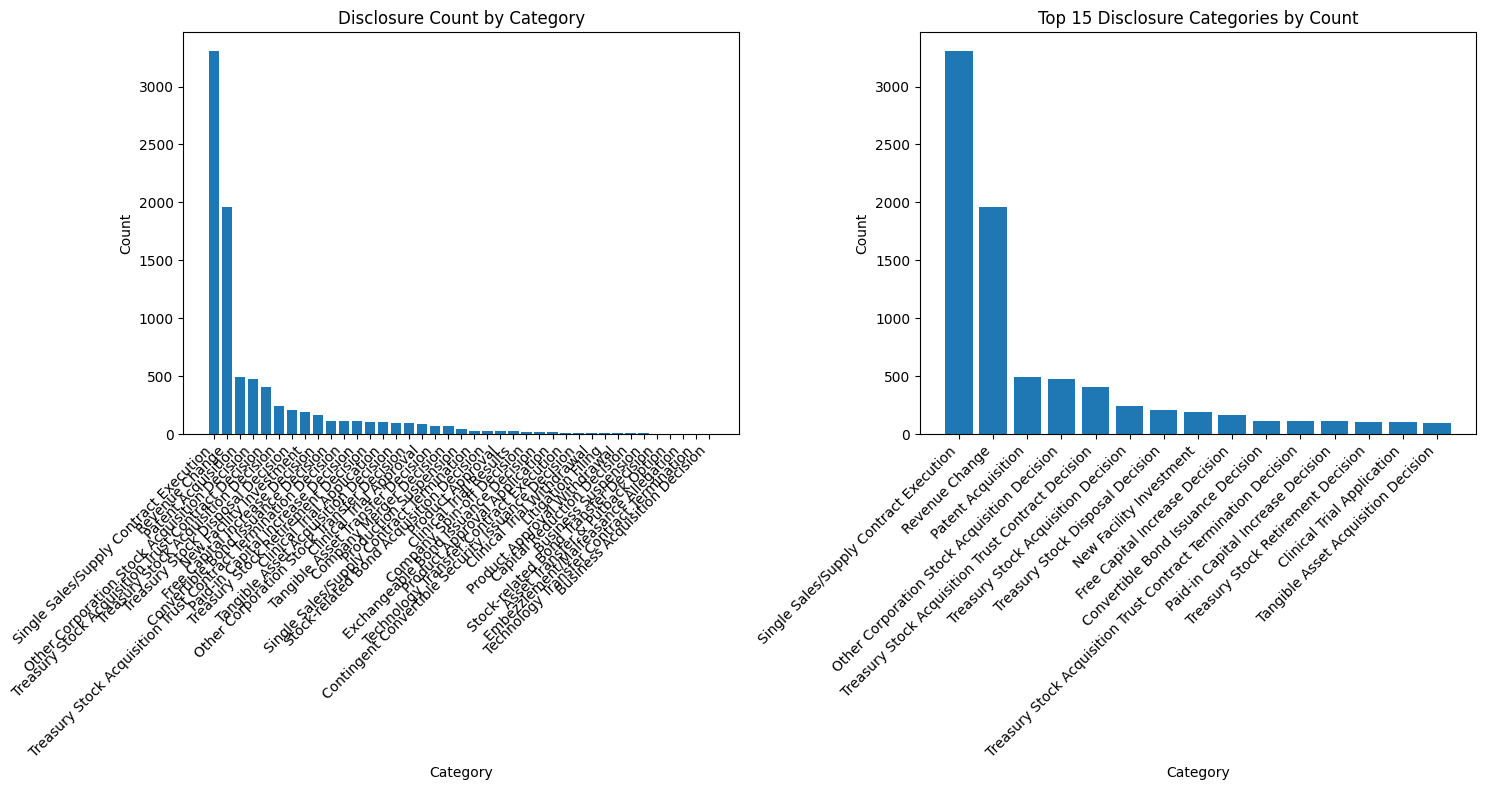

총 39개 카테고리, 총 8656건의 공시

상위 15개 카테고리:
disclosure_type
단일판매ㆍ공급계약체결           3303
매출액변동                 1963
특허권취득                  494
타법인 주식 및 출자증권 양수결정     477
자기주식취득 신탁계약 체결 결정      408
자기주식 취득 결정             238
자기주식 처분 결정             210
신규시설투자                 193
무상증자 결정                162
전환사채권 발행결정             115
자기주식취득 신탁계약 해지 결정      114
유상증자 결정                110
자기주식 소각 결정             102
임상 계획 신청               100
유형자산 양수 결정              93
Name: count, dtype: int64


In [13]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from config import keywords



df_with_returns = target_df.copy()
category_counts = df_with_returns['disclosure_type'].value_counts()

# 카테고리별 건수 시각화
plt.figure(figsize=(15, 8))
category_counts_sorted = category_counts.sort_values(ascending=False)

# 한글 카테고리를 영어로 매핑
category_counts_sorted_en = category_counts_sorted.copy()
category_counts_sorted_en.index = [category_mapping.get(cat, cat) for cat in category_counts_sorted_en.index]

plt.subplot(1, 2, 1)
plt.bar(range(len(category_counts_sorted_en)), category_counts_sorted_en.values)
plt.title('Disclosure Count by Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(category_counts_sorted_en)), category_counts_sorted_en.index, rotation=45, ha='right')

# 상위 15 카테고리만 별도 표시
plt.subplot(1, 2, 2)
top_15 = category_counts_sorted_en.head(15)
plt.bar(range(len(top_15)), top_15.values)
plt.title('Top 15 Disclosure Categories by Count')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(range(len(top_15)), top_15.index, rotation=45, ha='right')

plt.tight_layout()
plt.show()

print(f"총 {len(category_counts)}개 카테고리, 총 {category_counts.sum()}건의 공시")
print("\n상위 15개 카테고리:")
print(category_counts_sorted.head(15))

In [14]:
df_with_returns.isnull().sum()
df_with_returns.describe()
df_with_returns.info()

df_with_returns.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8656 entries, 0 to 8655
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   event_id           8656 non-null   int64              
 1   event_ts           8656 non-null   datetime64[ns, UTC]
 2   abn_ret_minus_9m   8568 non-null   float64            
 3   abn_ret_minus_8m   8578 non-null   float64            
 4   abn_ret_minus_7m   8590 non-null   float64            
 5   abn_ret_minus_6m   8598 non-null   float64            
 6   abn_ret_minus_5m   8611 non-null   float64            
 7   abn_ret_minus_4m   8622 non-null   float64            
 8   abn_ret_minus_3m   8639 non-null   float64            
 9   abn_ret_minus_2m   8644 non-null   float64            
 10  abn_ret_minus_1m   8650 non-null   float64            
 11  abn_ret_1m         8612 non-null   float64            
 12  abn_ret_2m         8575 non-null   float64      

,event_id,event_ts,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,...,abn_ret_10m,abn_ret_20m,abn_ret_30m,abn_ret_40m,abn_ret_50m,abn_ret_60m,company_name,disclosure_type,masked,label
0,157461,2021-01-04 10:08:00+00:00,-2.14,-1.20,-1.32,-1.93,-2.38,-2.05,-2.45,-1.76,...,-0.45,0.17,0.05,0.15,-0.15,0.18,에코바이오,단일판매ㆍ공급계약체결,"이 계약은 회사 A와 체결한 수도권매립지 제1,2매립장 유지관리 용역으로, 1차년도...",0
1,157459,2021-01-04 10:08:00+00:00,NaN,-1.45,-1.64,-1.44,-2.24,-2.49,-2.69,-1.96,...,-1.91,-0.66,-1.47,-1.37,-0.60,-0.95,제이엘케이,단일판매ㆍ공급계약체결,이 기업은 인공지능 기반 캡슐내시경 소프트웨어 개발 및 공급계약을 주식회사 A와 체...,1
2,157460,2021-01-04 10:08:00+00:00,-2.14,-1.20,-1.32,-1.93,-2.38,-2.05,-2.45,-1.76,...,-0.45,0.17,0.05,0.15,-0.15,0.18,에코바이오,단일판매ㆍ공급계약체결,이 계약은 수도권매립지관리공사와 체결한 50MW 발전 및 부대시설 위탁관리운영 계약...,0
3,157457,2021-01-04 10:14:00+00:00,-8.59,-8.32,-8.32,-8.19,-8.65,-8.42,-8.36,-8.10,...,-4.90,-4.20,-3.46,-5.53,-5.16,-6.00,엠아이텍,품목허가 승인,회사 A HANAROSTENT Trachea/Bronchium (CCC) 스텐트가 ...,1
4,157455,2021-01-04 10:16:00+00:00,0.50,0.23,0.21,0.23,0.23,0.15,0.01,-0.31,...,0.03,-0.83,-0.54,-0.96,-0.57,-1.83,한화시스템,단일판매ㆍ공급계약체결,이 회사 A는 2020년 12월 31일 국방과학연구소와 방위산업 보안을 위해 완성형...,-1


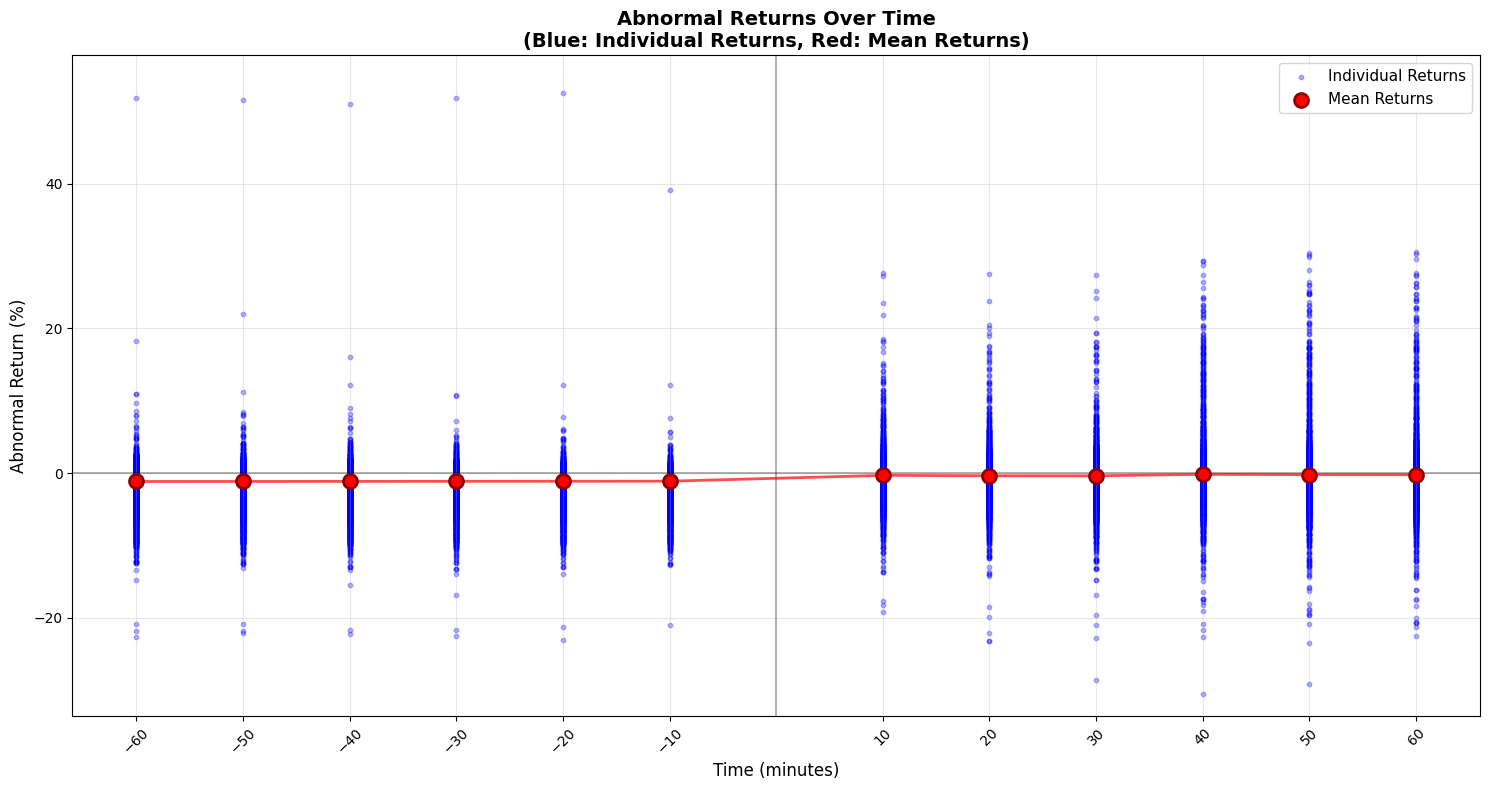

=== 시간별 수익률 통계 ===
전체 데이터 포인트 수: 92,780
시간 범위: -60분 ~ 60분
수익률 범위: -30.540% ~ 52.470%
전체 평균 수익률: -0.748%
전체 표준편차: 2.471%

=== 시간별 평균 수익률 ===
-60분: -1.170%
-50분: -1.165%
-40분: -1.155%
-30분: -1.144%
-20분: -1.137%
-10분: -1.128%
 10분: -0.325%
 20분: -0.380%
 30분: -0.385%
 40분: -0.180%
 50분: -0.225%
 60분: -0.238%

=== 이벤트 전후 비교 ===
이벤트 전 평균 수익률: -1.150%
이벤트 후 평균 수익률: -0.289%
이벤트 후 - 이벤트 전: 0.861%


In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 시간축 설정 (분 단위)
time_points = [-60, -50, -40, -30, -20, -10, 0, 10, 20, 30, 40, 50, 60]

# 수익률 컬럼들 (시간순서대로 정렬)
ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    0,  # 0분 시점은 없으므로 0으로 설정
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

# 실제 수익률 데이터가 있는 컬럼들만 추출
valid_ret_columns = [col for col in ret_columns if col != 0]
valid_time_points = [t for t in time_points if t != 0]

# 각 시간점별 데이터 수집
all_returns = []
all_times = []

for i, col in enumerate(valid_ret_columns):
    if col in df_with_returns.columns:
        # NaN이 아닌 데이터만 추출
        valid_data = df_with_returns[col].dropna()
        if len(valid_data) > 0:
            # 해당 시간점에 대한 모든 수익률 데이터 추가
            for ret in valid_data:
                all_returns.append(ret)
                all_times.append(valid_time_points[i])

# 개별 점들을 파란색으로 표시
plt.figure(figsize=(15, 8))
plt.scatter(all_times, all_returns, alpha=0.3, color='blue', s=10, label='Individual Returns')

# 각 시간점별 평균 계산 및 빨간색 점으로 표시
mean_returns = []
mean_times = []

for i, col in enumerate(valid_ret_columns):
    if col in df_with_returns.columns:
        valid_data = df_with_returns[col].dropna()
        if len(valid_data) > 0:
            mean_ret = valid_data.mean()
            mean_returns.append(mean_ret)
            mean_times.append(valid_time_points[i])

# 평균값들을 빨간색 점으로 표시
plt.scatter(mean_times, mean_returns, color='red', s=100, marker='o', 
           label='Mean Returns', zorder=5, edgecolor='darkred', linewidth=2)

# 평균값들을 빨간색 선으로 연결
plt.plot(mean_times, mean_returns, color='red', linewidth=2, alpha=0.7, zorder=4)

# 그래프 설정
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)  # 0% 수평선
plt.axvline(x=0, color='black', linestyle='-', alpha=0.3)  # 0분 수직선

plt.xlabel('Time (minutes)', fontsize=12)
plt.ylabel('Abnormal Return (%)', fontsize=12)
plt.title('Abnormal Returns Over Time\n(Blue: Individual Returns, Red: Mean Returns)', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)

# x축 라벨 설정
plt.xticks(valid_time_points, rotation=45)

# y축 범위 설정 (데이터에 따라 조정)
plt.ylim(min(all_returns) * 1.1, max(all_returns) * 1.1)

plt.tight_layout()
plt.show()

# 통계 정보 출력
print("=== 시간별 수익률 통계 ===")
print(f"전체 데이터 포인트 수: {len(all_returns):,}")
print(f"시간 범위: {min(valid_time_points)}분 ~ {max(valid_time_points)}분")
print(f"수익률 범위: {min(all_returns):.3f}% ~ {max(all_returns):.3f}%")
print(f"전체 평균 수익률: {np.mean(all_returns):.3f}%")
print(f"전체 표준편차: {np.std(all_returns):.3f}%")

print("\n=== 시간별 평균 수익률 ===")
for time, mean_ret in zip(mean_times, mean_returns):
    print(f"{time:3d}분: {mean_ret:6.3f}%")

# 이벤트 전후 비교
before_event = [mean_ret for time, mean_ret in zip(mean_times, mean_returns) if time < 0]
after_event = [mean_ret for time, mean_ret in zip(mean_times, mean_returns) if time > 0]

if before_event and after_event:
    print(f"\n=== 이벤트 전후 비교 ===")
    print(f"이벤트 전 평균 수익률: {np.mean(before_event):.3f}%")
    print(f"이벤트 후 평균 수익률: {np.mean(after_event):.3f}%")
    print(f"이벤트 후 - 이벤트 전: {np.mean(after_event) - np.mean(before_event):.3f}%")


In [16]:
import pandas as pd
import numpy as np

ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

# 실제 존재하는 컬럼만 필터링
valid_ret_columns = [col for col in ret_columns if col in df_with_returns.columns]

# 통계 계산을 위한 리스트 초기화
stats_data = []

for col in valid_ret_columns:
    abn_ret_data = df_with_returns[col].dropna()
    
    if len(abn_ret_data) > 0:
        total_count = len(abn_ret_data)
        total_mean = abn_ret_data.mean()
        total_std = abn_ret_data.std()
        positive_count = (abn_ret_data > 0).sum()
        total_positive_ratio = (positive_count / total_count * 100) if total_count > 0 else 0
        
        stats_data.append({
            'Column': col,
            'Count': total_count,
            'Mean (%)': round(total_mean, 3),
            'Std (%)': round(total_std, 3),
            'Positive_Count': positive_count,
            'Positive_Ratio (%)': round(total_positive_ratio, 1)
        })

# DataFrame으로 변환
stats_df = pd.DataFrame(stats_data)

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_60m': -60, 'abn_ret_minus_50m': -50, 'abn_ret_minus_40m': -40,
    'abn_ret_minus_30m': -30, 'abn_ret_minus_20m': -20, 'abn_ret_minus_10m': -10,
    'abn_ret_10m': 10, 'abn_ret_20m': 20, 'abn_ret_30m': 30,
    'abn_ret_40m': 40, 'abn_ret_50m': 50, 'abn_ret_60m': 60
}

stats_df['Time_Order'] = stats_df['Column'].map(time_order)
stats_df = stats_df.sort_values('Time_Order').drop('Time_Order', axis=1)


# 요약 통계
print(f"\n=== 요약 통계 ===")
print(f"총 컬럼 수: {len(stats_df)}")
print(f"총 데이터 포인트: {stats_df['Count'].sum():,}")
print(f"평균 수익률 범위: {stats_df['Mean (%)'].min():.3f}% ~ {stats_df['Mean (%)'].max():.3f}%")
print(f"표준편차 범위: {stats_df['Std (%)'].min():.3f}% ~ {stats_df['Std (%)'].max():.3f}%")

# 이벤트 전후 비교
before_event = stats_df[stats_df['Column'].str.contains('minus')]
after_event = stats_df[~stats_df['Column'].str.contains('minus')]

if len(before_event) > 0 and len(after_event) > 0:
    print(f"\n=== 이벤트 전후 비교 ===")
    print(f"이벤트 전 평균 수익률: {before_event['Mean (%)'].mean():.3f}%")
    print(f"이벤트 후 평균 수익률: {after_event['Mean (%)'].mean():.3f}%")
    print(f"이벤트 후 - 이벤트 전: {after_event['Mean (%)'].mean() - before_event['Mean (%)'].mean():.3f}%")


print("")
print("=== 전체 Abnormal Return 통계 ===")
print(stats_df.to_string(index=False))


=== 요약 통계 ===
총 컬럼 수: 12
총 데이터 포인트: 92,780
평균 수익률 범위: -1.170% ~ -0.180%
표준편차 범위: 1.886% ~ 3.380%

=== 이벤트 전후 비교 ===
이벤트 전 평균 수익률: -1.150%
이벤트 후 평균 수익률: -0.289%
이벤트 후 - 이벤트 전: 0.861%

=== 전체 Abnormal Return 통계 ===
           Column  Count  Mean (%)  Std (%)  Positive_Count  Positive_Ratio (%)
abn_ret_minus_60m   7835    -1.170    2.209            2002                25.6
abn_ret_minus_50m   7998    -1.165    2.172            1969                24.6
abn_ret_minus_40m   8158    -1.155    2.112            1944                23.8
abn_ret_minus_30m   8298    -1.144    2.050            1945                23.4
abn_ret_minus_20m   8428    -1.137    1.996            1882                22.3
abn_ret_minus_10m   8558    -1.128    1.886            1729                20.2
      abn_ret_10m   8233    -0.325    2.072            3382                41.1
      abn_ret_20m   7857    -0.380    2.253            3201                40.7
      abn_ret_30m   7436    -0.385    2.404            3005       

In [17]:
df_with_returns['label'].value_counts()

label
 1    4906
 0    2980
-1     770
Name: count, dtype: int64

# AI Inference

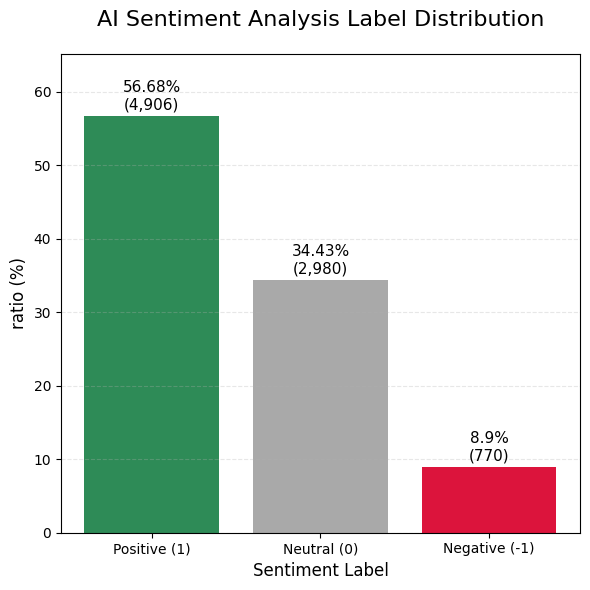

=== AI Sentiment Analysis Label Distribution ===
positive: 4,906건 (56.68%)
neutral: 2,980건 (34.43%)
negative: 770건 (8.9%)


In [18]:
# label 비율 시각화
plt.figure(figsize=(6, 6))

# label 비율 계산
label_counts = df_with_returns['label'].value_counts()
label_ratios = (label_counts / len(df_with_returns) * 100).round(2)

# 색상 매핑 (라벨 순서에 맞게)
colors = ['#2E8B57', '#A9A9A9', '#DC143C']  # 1: positive(초록), 0: neutral(회색), -1: negative(빨강)

# x축 라벨 설정: 1=Positive(초록), 0=Neutral(회색), -1=Negative(빨강)
label_order = [1, 0, -1]
label_names = ['Positive (1)', 'Neutral (0)', 'Negative (-1)']

# 막대 그래프 생성
bars = plt.bar(range(len(label_order)), [label_ratios.get(l, 0) for l in label_order], color=colors)

# 막대 위에 비율 표시
for i, label in enumerate(label_order):
    if label in label_counts:
        ratio = label_ratios[label]
        count = label_counts[label]
        plt.text(i, ratio + 0.5, f'{ratio}%\n({count:,})',
                 ha='center', va='bottom', fontsize=11)

plt.title('AI Sentiment Analysis Label Distribution', fontsize=16, pad=20)
plt.xlabel('Sentiment Label', fontsize=12)
plt.ylabel('ratio (%)', fontsize=12)
plt.ylim(0, max(label_ratios.values) * 1.15)

plt.xticks(range(len(label_order)), label_names)
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

print("=== AI Sentiment Analysis Label Distribution ===")
for i, label in enumerate(label_order):
    if label in label_counts:
        count = label_counts[label]
        ratio = label_ratios[label]
        print(f"{label_names[i].split()[0].lower()}: {count:,}건 ({ratio}%)")


# Event Study

## 10 minute interval

In [19]:
ret_columns = [
    'abn_ret_minus_60m', 'abn_ret_minus_50m', 'abn_ret_minus_40m', 
    'abn_ret_minus_30m', 'abn_ret_minus_20m', 'abn_ret_minus_10m',
    'abn_ret_10m', 'abn_ret_20m', 'abn_ret_30m', 
    'abn_ret_40m', 'abn_ret_50m', 'abn_ret_60m'
]

print("Mean")
print(df_with_returns.groupby('label')[ret_columns].mean().to_string())

print()
print("Stdandard deviation")
print(df_with_returns.groupby('label')[ret_columns].std().to_string())

Mean
       abn_ret_minus_60m  abn_ret_minus_50m  abn_ret_minus_40m  abn_ret_minus_30m  abn_ret_minus_20m  abn_ret_minus_10m  abn_ret_10m  abn_ret_20m  abn_ret_30m  abn_ret_40m  abn_ret_50m  abn_ret_60m
label                                                                                                                                                                                                
-1             -0.370270          -0.340469          -0.335205          -0.348303          -0.314404          -0.310366    -0.332500    -0.381194    -0.415871    -0.396169    -0.555251    -0.600158
 0             -0.998820          -1.012305          -1.027950          -1.014001          -1.015444          -1.001263    -0.321697    -0.377424    -0.396336    -0.213796    -0.257096    -0.276837
 1             -1.405858          -1.393571          -1.364705          -1.350555          -1.342805          -1.333870    -0.325026    -0.380890    -0.374831    -0.130606    -0.164474    -0.172199

Stda

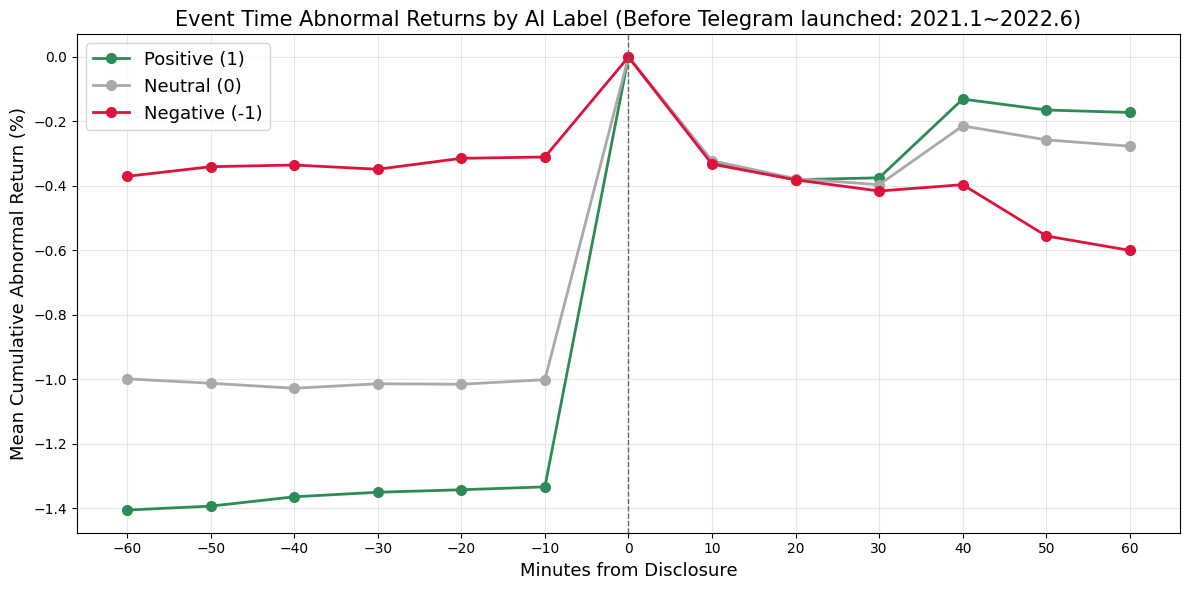

In [20]:
# X축 -60, -50, ..., 0, 10, ..., 60, Y축 abnormal_ret_*m 평균값, 라벨별 색상/범례
# 각 데이터 포인트에 점도 표시 (marker 추가)
# 0,0도 점 찍고 연결

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_60m': -60, 'abn_ret_minus_50m': -50, 'abn_ret_minus_40m': -40,
    'abn_ret_minus_30m': -30, 'abn_ret_minus_20m': -20, 'abn_ret_minus_10m': -10,
    'abn_ret_10m': 10, 'abn_ret_20m': 20, 'abn_ret_30m': 30,
    'abn_ret_40m': 40, 'abn_ret_50m': 50, 'abn_ret_60m': 60
}

ordered_ret_cols = [col for col, _ in sorted(time_order.items(), key=lambda x: x[1]) if col in df_with_returns.columns]
plot_time_points = [time_order[col] for col in ordered_ret_cols]

# 0을 x축에도 추가
xticks_with_zero = sorted(set(plot_time_points + [0]))

fig, ax = plt.subplots(figsize=(12,6))

for label, color, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]
    mean_vals = grp[ordered_ret_cols].mean()
    # 0,0을 시작점으로 붙여줌
    times_all = [0] + plot_time_points
    vals_all = [0.0] + list(mean_vals.values)
    # 정렬 - 시간 오름차순 정렬
    times_and_vals = sorted(zip(times_all, vals_all), key=lambda x: x[0])
    sorted_times = [x[0] for x in times_and_vals]
    sorted_vals = [x[1] for x in times_and_vals]
    ax.plot(sorted_times, sorted_vals, label=name, color=color, linewidth=2, marker='o', markersize=7)

ax.axvline(0, color="#666", linestyle="--", lw=1)
ax.legend(fontsize=13)
ax.set_xticks(xticks_with_zero)
ax.set_xlabel("Minutes from Disclosure", fontsize=13)
ax.set_ylabel("Mean Cumulative Abnormal Return (%)", fontsize=13)
ax.set_title("Event Time Abnormal Returns by AI Label (Before Telegram launched: 2021.1~2022.6)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


## 1 minute interval

In [21]:
ret_columns = [
    'abn_ret_minus_10m', 'abn_ret_minus_9m', 'abn_ret_minus_8m', 'abn_ret_minus_7m', 'abn_ret_minus_6m', 
    'abn_ret_minus_5m', 'abn_ret_minus_4m', 'abn_ret_minus_3m', 'abn_ret_minus_2m', 'abn_ret_minus_1m',
    'abn_ret_1m', 'abn_ret_2m', 'abn_ret_3m', 'abn_ret_4m', 'abn_ret_5m',
    'abn_ret_6m', 'abn_ret_7m', 'abn_ret_8m', 'abn_ret_9m', 'abn_ret_10m'
]

print("Mean")
print(df_with_returns.groupby('label')[ret_columns].mean().to_string())

print()
print("Stdandard deviation")
print(df_with_returns.groupby('label')[ret_columns].std().to_string())

Mean
       abn_ret_minus_10m  abn_ret_minus_9m  abn_ret_minus_8m  abn_ret_minus_7m  abn_ret_minus_6m  abn_ret_minus_5m  abn_ret_minus_4m  abn_ret_minus_3m  abn_ret_minus_2m  abn_ret_minus_1m  abn_ret_1m  abn_ret_2m  abn_ret_3m  abn_ret_4m  abn_ret_5m  abn_ret_6m  abn_ret_7m  abn_ret_8m  abn_ret_9m  abn_ret_10m
label                                                                                                                                                                                                                                                                                                              
-1             -0.310366         -0.323885         -0.329701         -0.333641         -0.314226         -0.314226         -0.322042         -0.329311         -0.323519         -0.316909   -0.089527   -0.147384   -0.183772   -0.199030   -0.256128   -0.265910   -0.276346   -0.286356   -0.306761    -0.332500
 0             -1.001263         -1.005546         -1.007184         -0

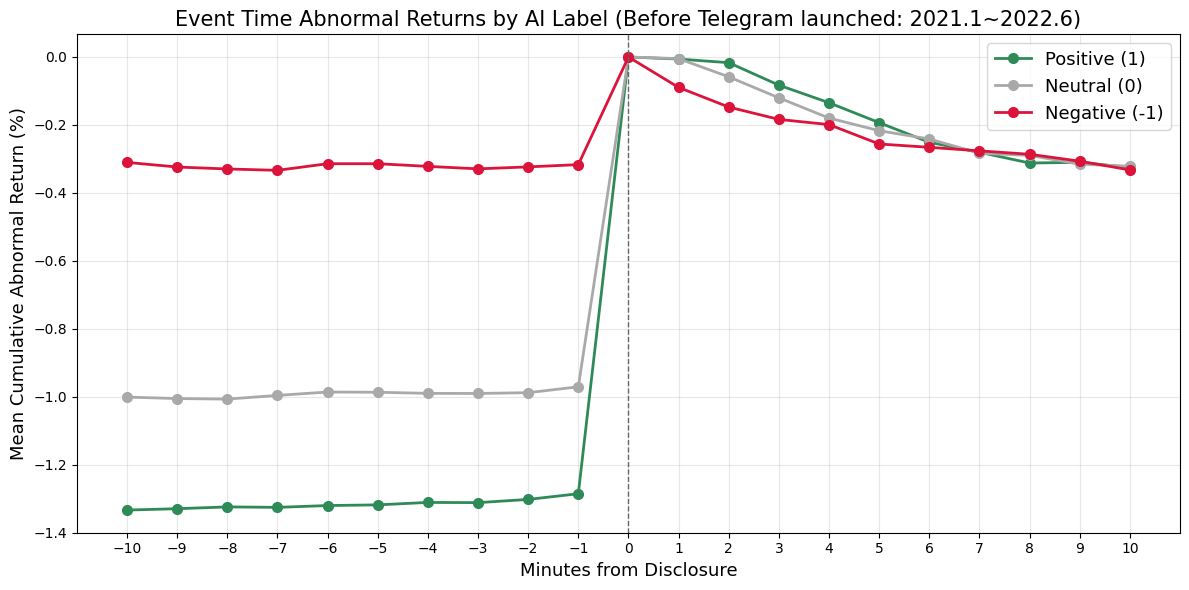

In [22]:
# X축 -60, -50, ..., 60, Y축 abnormal_ret_*m 평균값, 라벨별 색상/범례
# 각 데이터 포인트에 점도 표시 (marker 추가)
# 0,0도 점 찍고 연결

# 시간순으로 정렬 (마이너스 시간이 먼저 오도록)
time_order = {
    'abn_ret_minus_10m': -10, 'abn_ret_minus_9m': -9, 'abn_ret_minus_8m': -8, 'abn_ret_minus_7m': -7,
    'abn_ret_minus_6m': -6, 'abn_ret_minus_5m': -5, 'abn_ret_minus_4m': -4, 'abn_ret_minus_3m': -3,
    'abn_ret_minus_2m': -2, 'abn_ret_minus_1m': -1,
    'abn_ret_1m': 1, 'abn_ret_2m': 2, 'abn_ret_3m': 3, 'abn_ret_4m': 4,
    'abn_ret_5m': 5, 'abn_ret_6m': 6, 'abn_ret_7m': 7, 'abn_ret_8m': 8, 'abn_ret_9m': 9, 'abn_ret_10m': 10
}

ordered_ret_cols = [col for col, _ in sorted(time_order.items(), key=lambda x: x[1]) if col in df_with_returns.columns]
plot_time_points = [time_order[col] for col in ordered_ret_cols]

# 0도 x축에 표시(xticks에 0 추가)
xticks_with_zero = sorted(list(set(plot_time_points) | {0}))

fig, ax = plt.subplots(figsize=(12,6))

for label, color, name in zip(label_order, colors, label_names):
    grp = df_with_returns[df_with_returns['label'] == label]
    mean_vals = grp[ordered_ret_cols].mean()
    # 0,0을 시작점으로 붙여줌
    times_all = [0] + plot_time_points
    vals_all = [0.0] + list(mean_vals.values)
    # 정렬 - 시간 오름차순 정렬
    times_and_vals = sorted(zip(times_all, vals_all), key=lambda x: x[0])
    sorted_times = [x[0] for x in times_and_vals]
    sorted_vals = [x[1] for x in times_and_vals]
    ax.plot(sorted_times, sorted_vals, label=name, color=color, linewidth=2, marker='o', markersize=7)

ax.axvline(0, color="#666", linestyle="--", lw=1)
ax.legend(fontsize=13)
ax.set_xticks(xticks_with_zero)
ax.set_xlabel("Minutes from Disclosure", fontsize=13)
ax.set_ylabel("Mean Cumulative Abnormal Return (%)", fontsize=13)
ax.set_title("Event Time Abnormal Returns by AI Label (Before Telegram launched: 2021.1~2022.6)", fontsize=15)
plt.grid(alpha=0.3, linestyle='-')
plt.tight_layout()
plt.show()


# 공시 종류별 감성 분포

In [23]:
df_with_returns.groupby('disclosure_type')[ret_columns].mean().round(2)


,abn_ret_minus_10m,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,abn_ret_minus_1m,abn_ret_1m,abn_ret_2m,abn_ret_3m,abn_ret_4m,abn_ret_5m,abn_ret_6m,abn_ret_7m,abn_ret_8m,abn_ret_9m,abn_ret_10m
disclosure_type,,,,,,,,,,,,,,,,,,,,
감자 결정,-1.62,-1.55,-1.55,-1.59,-1.41,-1.46,-1.41,-1.56,-1.20,-0.83,-0.44,-0.99,-1.21,-1.26,-1.72,-1.89,-2.01,-2.14,-2.07,-2.12
교환사채권 발행결정,0.09,0.01,0.06,0.00,0.12,0.07,-0.00,0.05,0.01,-0.09,-0.34,-0.51,-0.68,-0.61,-0.71,-0.80,-0.76,-0.76,-0.87,-0.86
기술이전계약체결,-5.12,-4.53,-4.70,-4.23,-4.28,-4.27,-4.10,-3.76,-3.80,-3.62,-0.87,-0.28,-0.24,-0.10,0.48,0.29,0.18,0.96,2.31,2.98
기술이전계약해지,-0.60,-0.60,-0.80,-0.84,-0.88,-0.91,-0.64,-0.49,-0.80,-0.84,-0.24,-0.47,-0.55,-1.26,-1.70,-2.13,-1.97,-1.97,-1.97,-2.04
단일판매ㆍ공급계약체결,-1.45,-1.45,-1.45,-1.44,-1.43,-1.42,-1.42,-1.42,-1.41,-1.40,0.03,-0.00,-0.10,-0.18,-0.25,-0.30,-0.33,-0.37,-0.37,-0.40
단일판매ㆍ공급계약해지,0.06,0.09,0.04,-0.04,0.01,-0.03,-0.01,-0.03,-0.06,-0.08,0.19,0.06,0.15,-0.10,-0.10,-0.13,-0.14,-0.17,-0.20,-0.21
매출액변동,-0.82,-0.82,-0.82,-0.82,-0.81,-0.82,-0.81,-0.81,-0.81,-0.79,-0.06,-0.12,-0.17,-0.21,-0.25,-0.27,-0.29,-0.31,-0.32,-0.33
무상증자 결정,-0.47,-0.47,-0.51,-0.49,-0.49,-0.49,-0.47,-0.45,-0.44,-0.40,0.03,0.06,-0.01,-0.07,-0.07,-0.10,-0.17,-0.18,-0.25,-0.29
상각형 조건부자본증권 발행결정,-0.05,0.01,0.09,0.11,-0.05,-0.06,-0.04,0.04,-0.04,0.01,-0.08,-0.06,-0.10,-0.11,-0.14,-0.20,-0.20,-0.21,-0.15,-0.14


In [24]:
df_with_returns.groupby('disclosure_type')[ret_columns].std()


,abn_ret_minus_10m,abn_ret_minus_9m,abn_ret_minus_8m,abn_ret_minus_7m,abn_ret_minus_6m,abn_ret_minus_5m,abn_ret_minus_4m,abn_ret_minus_3m,abn_ret_minus_2m,abn_ret_minus_1m,abn_ret_1m,abn_ret_2m,abn_ret_3m,abn_ret_4m,abn_ret_5m,abn_ret_6m,abn_ret_7m,abn_ret_8m,abn_ret_9m,abn_ret_10m
disclosure_type,,,,,,,,,,,,,,,,,,,,
감자 결정,1.769324,1.598292,1.580721,1.788222,1.531319,1.729910,1.616730,1.883091,1.679259,1.561533,1.332298,1.044307,1.519992,1.849537,1.983071,2.272274,2.362503,2.534299,2.476516,2.514683
교환사채권 발행결정,0.828307,0.856153,0.805341,0.801461,0.841762,0.843955,0.773332,0.723085,0.639953,0.841086,1.043683,1.142951,2.186561,1.775230,2.116820,2.085705,2.122116,2.040644,2.177044,2.397174
기술이전계약체결,4.444350,3.990177,4.085430,3.431100,3.371759,3.222756,3.373898,3.418828,3.415202,3.538569,1.224214,1.733172,3.333784,3.923655,5.379219,4.849525,4.983771,5.924790,7.694696,7.934926
기술이전계약해지,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
단일판매ㆍ공급계약체결,1.928497,1.923974,1.917932,1.916237,1.910698,1.901313,1.894770,1.894885,1.884301,1.873909,1.366389,1.657319,1.820943,1.961636,2.027291,2.088174,2.140024,2.129218,2.130738,2.126138
단일판매ㆍ공급계약해지,0.729629,0.671952,0.577139,0.580926,0.554600,0.543119,0.538582,0.513139,0.453599,0.384528,0.773145,0.536434,0.543877,0.583333,0.440210,0.651889,0.688089,0.655661,0.841286,0.736724
매출액변동,1.446161,1.444864,1.439282,1.430941,1.439947,1.424602,1.425173,1.412084,1.398982,1.400420,1.062269,1.216427,1.405636,1.453652,1.433741,1.535714,1.536040,1.567670,1.675997,1.678760
무상증자 결정,1.557557,1.512008,1.470646,1.488715,1.524536,1.526666,1.467935,1.483734,1.448007,1.434817,0.468146,0.668220,0.962593,1.060120,1.021534,1.075965,0.944446,0.871167,0.883037,0.947891
상각형 조건부자본증권 발행결정,0.236099,0.269944,0.245168,0.259639,0.240357,0.264346,0.177518,0.181895,0.236266,0.107005,0.173035,0.147358,0.234825,0.187574,0.166969,0.181029,0.224404,0.295675,0.254652,0.236844


In [25]:
# 공시 종류별 sentiment 분포 분석 (disclosure_type 기준)
disclosure_sentiment = df_with_returns.groupby(['disclosure_type', 'label']).size().unstack(fill_value=0)

# label 컬럼 정렬: negative(-1), neutral(0), positive(1) 순서
label_sort_order = [-1, 0, 1]
filtered_columns = [col for col in label_sort_order if col in disclosure_sentiment.columns]
disclosure_sentiment = disclosure_sentiment[filtered_columns]

# 비율로 변환
disclosure_sentiment_pct = disclosure_sentiment.div(disclosure_sentiment.sum(axis=1), axis=0) * 100

# 수치 요약 전체 DataFrame으로 만들어서 출력 (전체 공시 종류)
summary_df = disclosure_sentiment.copy()
for col in disclosure_sentiment_pct.columns:
    summary_df[f"{col}_pct"] = disclosure_sentiment_pct[col].round(1)

# 샘플 개수(행별 합) 기준 내림차순 정렬
summary_df['total_count'] = summary_df[[col for col in [-1, 0, 1] if col in summary_df.columns]].sum(axis=1)
summary_df = summary_df.sort_values('total_count', ascending=False)
summary_df = summary_df.drop(columns=['total_count'])

print("=== 전체 공시 종류별 감정 분포 ===")
summary_df

=== 전체 공시 종류별 감정 분포 ===


label,-1,0,1,-1_pct,0_pct,1_pct
disclosure_type,,,,,,
단일판매ㆍ공급계약체결,7,1503,1793,0.2,45.5,54.3
매출액변동,465,282,1216,23.7,14.4,61.9
특허권취득,0,25,469,0.0,5.1,94.9
타법인 주식 및 출자증권 양수결정,8,195,274,1.7,40.9,57.4
자기주식취득 신탁계약 체결 결정,3,139,266,0.7,34.1,65.2
자기주식 취득 결정,0,20,218,0.0,8.4,91.6
자기주식 처분 결정,61,145,4,29.0,69.0,1.9
신규시설투자,0,86,107,0.0,44.6,55.4
무상증자 결정,3,59,100,1.9,36.4,61.7


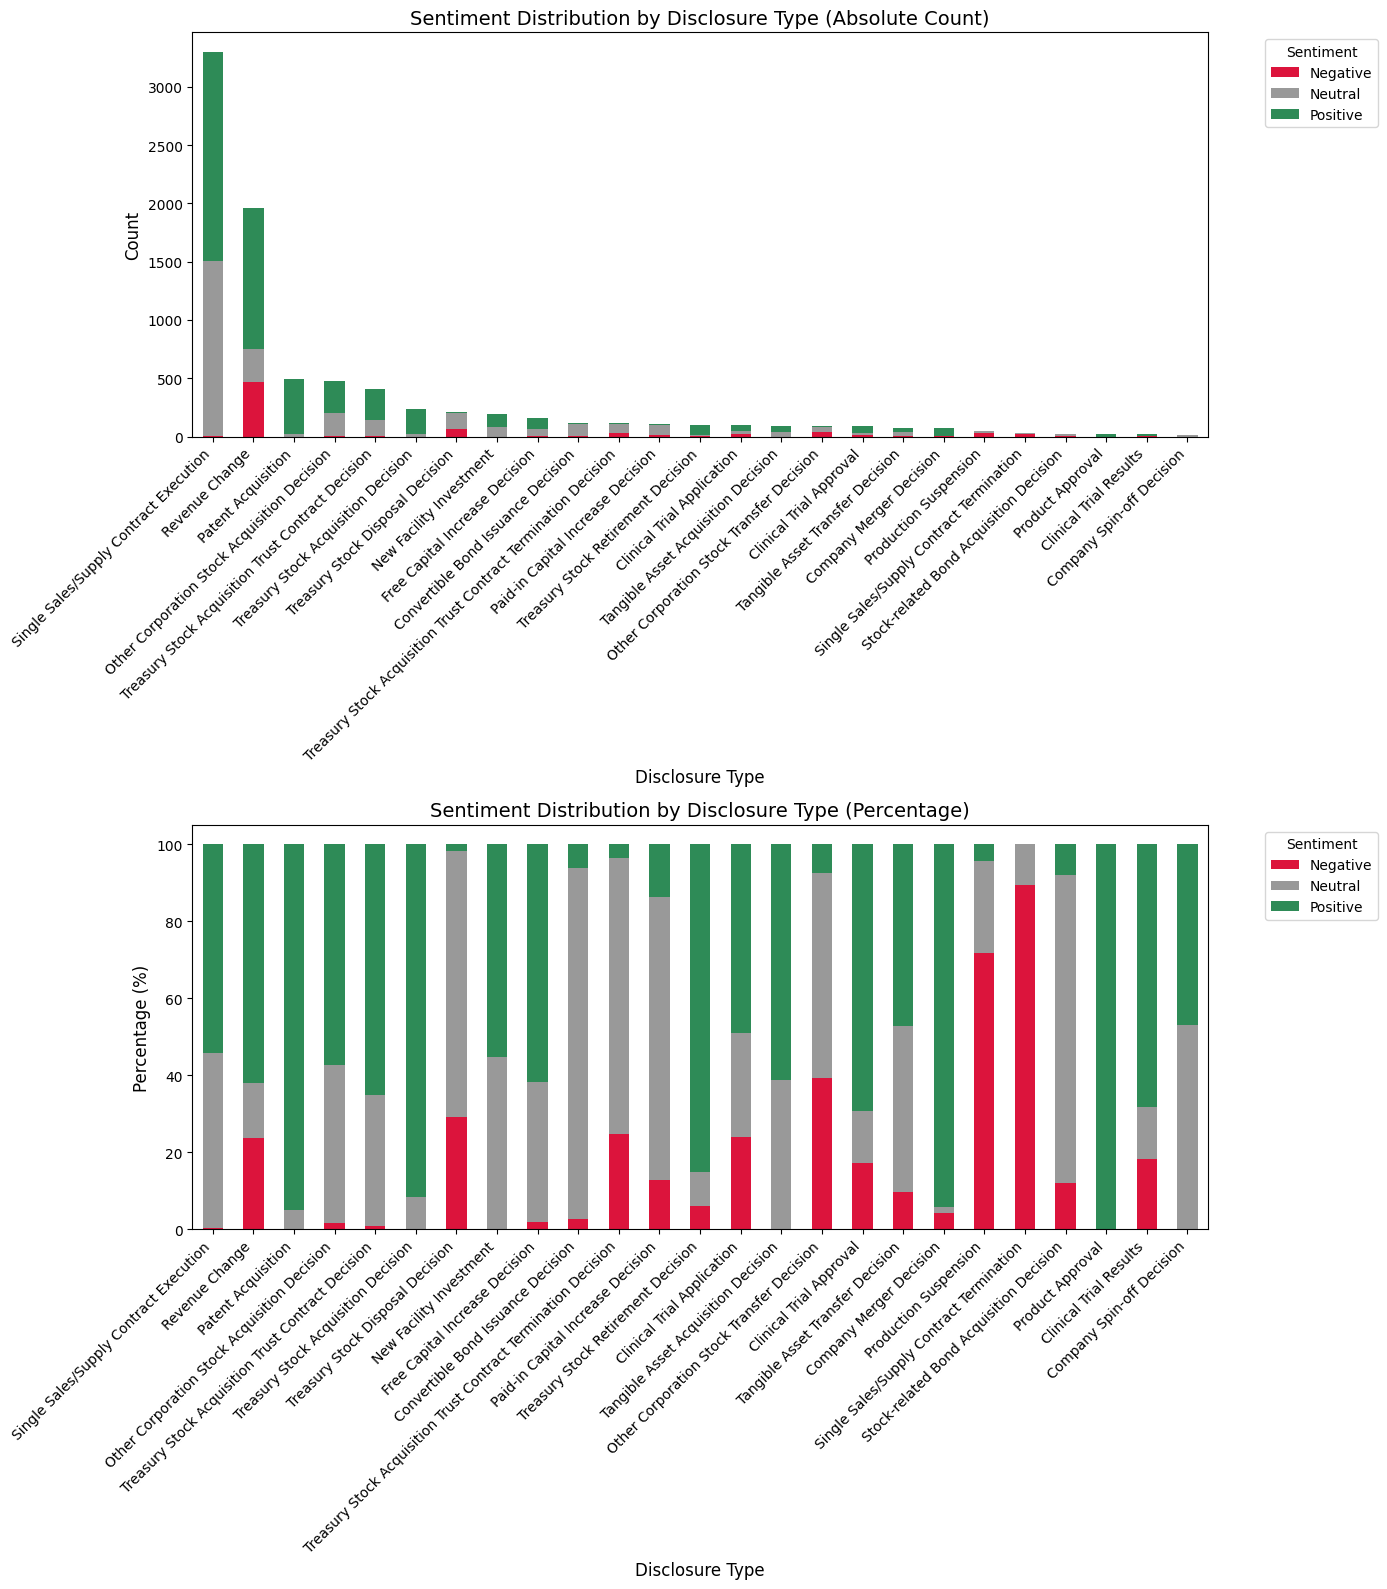

In [26]:
# 상위 20개 공시 종류만 선택 (데이터가 많은 순서대로)
top_disclosures = df_with_returns['disclosure_type'].value_counts().head(25).index
disclosure_sentiment_top = disclosure_sentiment.loc[top_disclosures]
disclosure_sentiment_pct_top = disclosure_sentiment_pct.loc[top_disclosures]

# 색상 매핑: negative(빨강), neutral(회색), positive(초록)
sentiment_colors = {
    -1: "#DC143C", # 빨강 (negative)
     0: "#999999", # 회색 (neutral)
     1: "#2E8B57"  # 초록 (positive)
}
plot_colors = [sentiment_colors[col] for col in filtered_columns]

# 시각화 (세로 2개로 배치)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 16))

# 1. 절대 개수
disclosure_sentiment_top.plot(kind='bar', stacked=True, ax=ax1, color=plot_colors)
ax1.set_title('Sentiment Distribution by Disclosure Type (Absolute Count)', fontsize=14)
ax1.set_xlabel('Disclosure Type', fontsize=12)
ax1.set_ylabel('Count', fontsize=12)
ax1.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

x_labels = [category_mapping.get(cat, cat) for cat in top_disclosures]
ax1.set_xticklabels(x_labels, rotation=45, ha='right')

# 2. 비율(%)
disclosure_sentiment_pct_top.plot(kind='bar', stacked=True, ax=ax2, color=plot_colors)
ax2.set_title('Sentiment Distribution by Disclosure Type (Percentage)', fontsize=14)
ax2.set_xlabel('Disclosure Type', fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12)
ax2.legend([ 'Negative', 'Neutral', 'Positive' ], title='Sentiment', bbox_to_anchor=(1.05, 1), loc='upper left')

ax2.set_xticklabels(x_labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()
